### Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips

In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


sb.set_theme(style='whitegrid')
tips = sb.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
round(tips.describe(include='all'),2)

,total_bill,tip,sex,smoker,day,time,size
count,244.00,244.00,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.79,3.00,NaN,NaN,NaN,NaN,2.57
std,8.90,1.38,NaN,NaN,NaN,NaN,0.95
min,3.07,1.00,NaN,NaN,NaN,NaN,1.00
25%,13.35,2.00,NaN,NaN,NaN,NaN,2.00
50%,17.80,2.90,NaN,NaN,NaN,NaN,2.00
75%,24.13,3.56,NaN,NaN,NaN,NaN,3.00


>Dades inicials de les que disposem;
    
- Preu mitja per compte = 19.79
- Top Day = Dissabte
- Top Shift = Sopar
- Propina mitjana = 3
- Num mitjà de comensals = 2.57 
     

> Buscarem la rel·lació entre el numero de comensals i el valor de propina, a mes ho contrastarem amb el moment del dia, depenent de si es tracta de dinars o sopars.

- ¿Quin es el nombre de comensals més comú?
- ¿Com més gran el grup més gran la propina? 
- ¿en quin apat? 
- ¿Outliers o Casos molt extranys/valuosos?


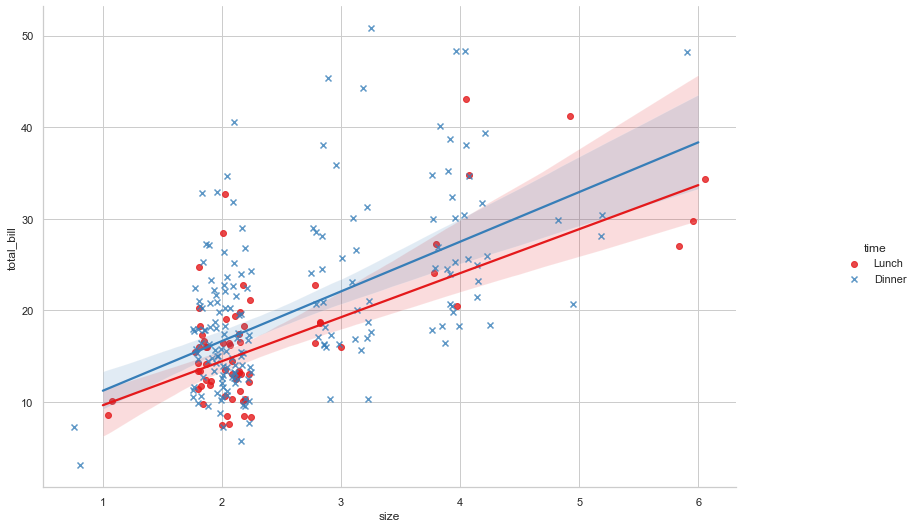

In [3]:
ax = sb.lmplot(data = tips,
          x = 'size', 
          y = 'total_bill', 
          x_jitter = .25,
          markers = ['o','x'],
          palette = 'Set1',
          robust = True,
          hue='time');
ax.fig.set_size_inches(14,8)


> Sigui com sigui s'ingressen mes diners per sopars que per dinars, linea de tendéncia similar ¿serà que la gent gasta més de nit? o potser una altra cosa?

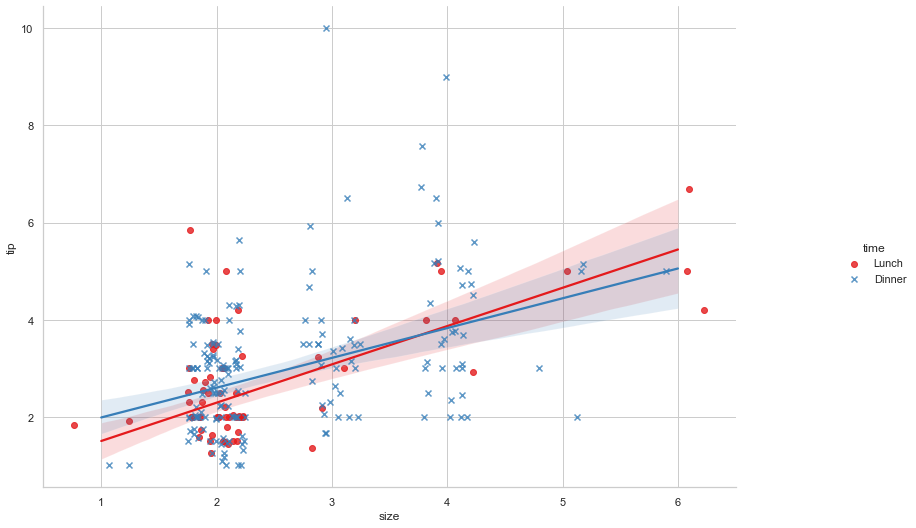

In [4]:
ax = sb.lmplot(data = tips,
          x = 'size', 
          y = 'tip', 
          x_jitter = .25,
          markers = ['o','x'],
          palette = 'Set1',
          robust = True,
          hue='time');
ax.fig.set_size_inches(14,8)


>Podem veure que:

1. el grup majoritari de clients son parelles;        
    - Concorda amb la mitja de comensals
    - la majoria de mostres estàn per sota de la propina mitjana (especialment als dinars).
    
    
2. s'aprecia una distribució entre ambdos horaris a més observant el volum de mostres sembla que hi ha 
   molta diferencia entre el total de dinars i el total de sopars;       
    - Potser ampliant la distribució del marc temporal amb un gràfic per dies podriem saber com es diferencien 
    els dos torns (Dinar/Sopar) tant en volum de comensals com de propines/comptes al llarg de la "setmana".

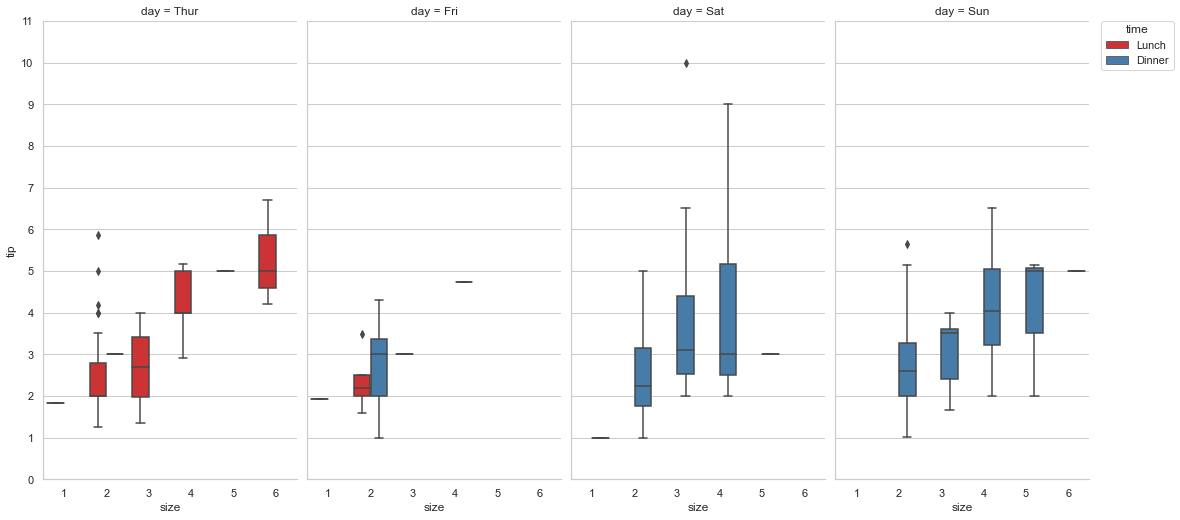

In [5]:
ax = sb.catplot(data=tips,
                x='size',
                y='tip',
                hue='time',
                col = 'day',
                palette = 'Set1',                
                kind='box'
               )
ax.set(yticks=np.arange(0,12,1))
sb.move_legend(ax,'upper right', bbox_to_anchor=(1.02,0.935), frameon=True)
ax.fig.set_size_inches(16,8)


> Sembla que les dades del dinar presenten distribució unimodal sesgada cap al Dijous, en aquest tipus de gràfic no s'hi aprecien sopars tampoc.
Per altra banda les dades dels sopar sembla que tenen la distribució bimodal concentrant-se majoritariament en dissabte i diumenge.

> Potser un scatterplot faria millor feina de visualitzar, ja que amb el boxplot no s'aprecien be les dades petites/residuals.

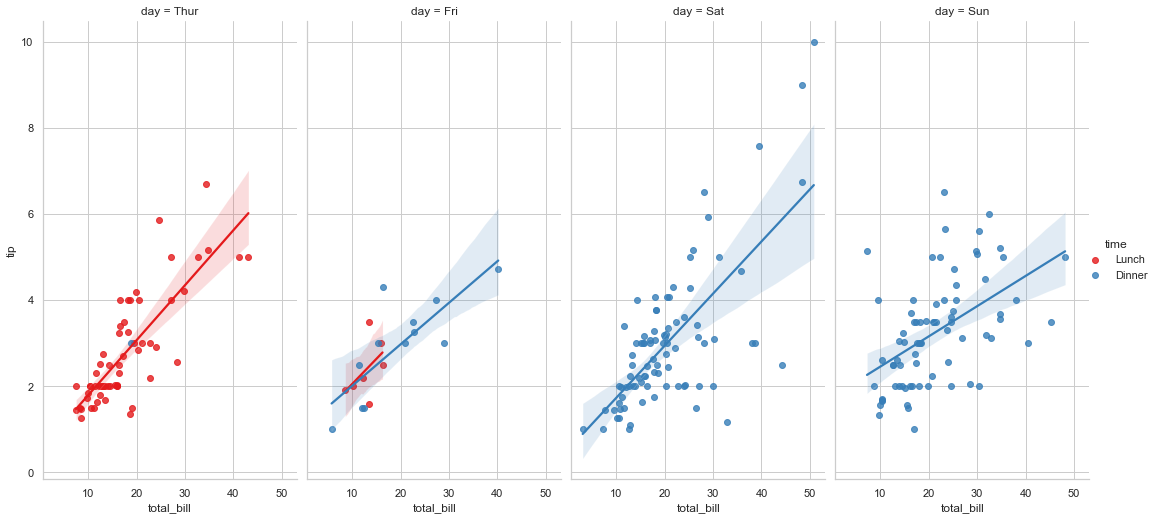

In [6]:
ax = sb.lmplot(x='total_bill',
               y='tip',
               data=tips,
               hue = 'time',
               col ='day',
               palette = 'Set1'
              );
ax.fig.set_size_inches(16,8)

> Et Voilà! :

1. S'aprecia clarament una distribució sesgada en funció dels dies; 

    - Dijous: Son tot dinars i només un sopar (absolutament **tot** el local per ells, en direm Turbo_Intimate, 
    ja que **es una anomalia prou important** que desafia la lògica del sentit comú amb les dades que tenim). 
    
    - Divendres: És el dia mes fluix, amb només 6 dinars i 11 sopars, en cuant al compte, els dinars no 
    passen de 17 dolars, als sopars es gasta mes. 
    
    - Dissabte / Diumenge: Només surten sopars, ergo...podem deduir que el local no obre al mitgdia. 

2. Realitzem una sèrie on es poden veure les diferències per dies en funció del sexe (files) i si son fumadors o no (columnes). D'aquesta manera (si les dades fossin idealment fidedignes) podríem clusteritzar el grups, veure quines son les seves afluències i potser detectar que s'estàn dedicant recursos excessius en un dia/horari en concret, això ens permetria redistribuir la força de treball o les ofertes.


    (i.e: Modificant els horaris dels cambrers o de la cuina per aprofitar millor les tendències).  

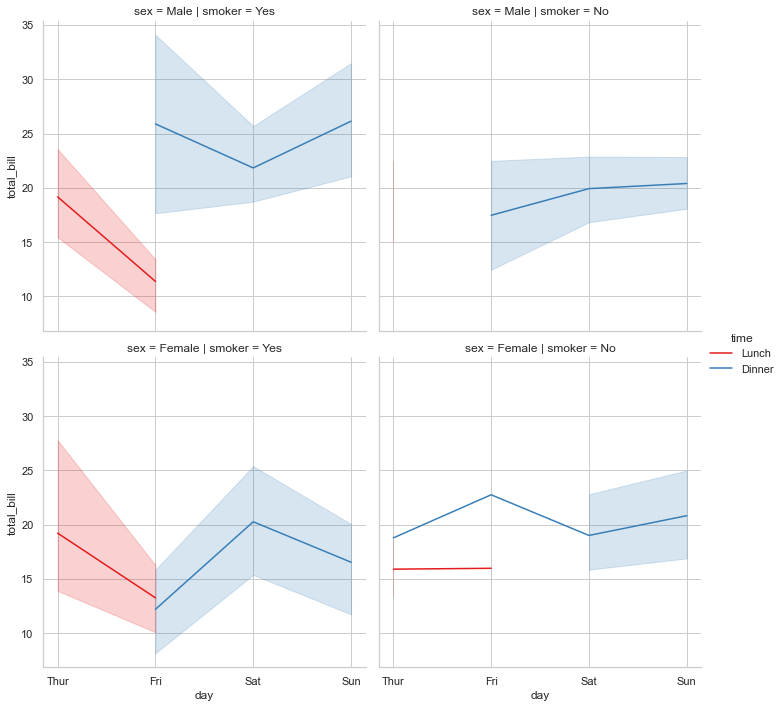

In [7]:
ax = sb.relplot(x="day",
                y="total_bill",
                hue="time",
                row = 'sex',
                col = 'smoker',
                palette='Set1', 
                kind="line",
                data=tips
               );    

> Last but not least , la anomalia/outlier més important, els TURBO_INTIMATE. Aquí podríem elaborar vàries hipotesis, però lamentablement les dades de les que disposem no ens poden oferir un coneixement més precís d'aquesta mostra en concret.

>El que sí podem utilitzar és el "sentit comú" per anar una mica mes lluny...

In [8]:
turbo_intimate = tips[(tips['time'].str.contains('Dinner')) & (tips['day'].str.contains('Thur'))]
turbo_intimate.head()

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2


>Consultem una mica més alguns totals dels dinars del dijous per contrastar amb el sopar íntim que ja tenim...

In [9]:
dinars_dijous = tips[(tips['time'].str.contains('Lunch') & tips['day'].str.contains('Thur'))]

clients_dinar_dijous = sum(dinars_dijous['size'])

caixa_dinars_dijous = int(sum(dinars_dijous['total_bill']))

print(f'El dijous van venir {clients_dinar_dijous} persones a dinar i es van fer {caixa_dinars_dijous}.$ al mitgdia' )

El dijous van venir 150 persones a dinar i es van fer 1077.$ al mitgdia


**Olrait!** 

> Doncs si! ,  una parella ha tingut el restaurant tot per ells per menys de 16 dolars el sopar + 3 de propina  , però no te gaire sentit. Lògicament sen's presenten vàries hipotesis per poder destriar, però haurem de començar per l'arrel:

Podem:

1. Creure totalment en la integritat de les dades, es a dir, confiem en que és totalment correcte, llavors:

    - A : Podrien haver reservat tot el restaurant, però es evident que els gastos del local i del personal per a un sopar privat excedeix de llarg el que ha gastat aquesta parella. Per tant, **amb tota certesa NO van reservar**. 
    
     
         - (i.e: En cas que es tractés d'un event personal, com per exemple un sopar íntim del amo o algun familiar,          no tindria gaire sentit cobrar-se a sí mateix, i si fos un regal a un familiar encara tindria menys sentit cobrar-li una suma tan banal.)
    
    - B : Si el restaurant estava obert i només van venir ells, llavors son males notícies per al propietari i en especial per la seva gestió dels recursos. Aquella nit el restaurant només va fer 18,78 de caixa, però si tenim en compte la variació entre l'afluència dels horaris de la cuina el dijous, llavors **no sembla gens lògic que un restaurant que serveix 150 dinars tingui només un sopar de dos el mateix dia**. 
    
    
         - (i.e: Potser hi havia un event esportiu/social que va afectar la afluencia? pero no es probable ja que si 
            fos algun esdeveniment suficientment important com per afectar l'afluència al restaurant es d'esperar que 
            el amo del restaurant també en fos conscient i ho tingués present decidint no obrir,ja que no faria 
            caixa, com per exemple fa amb els dinars dels Dissabtes i Diumenges).
    
    
2. Creure parcialment en la integritat de les dades, es a dir, potser alguna part d'elles es incorrecte:

    - La classificació dels **turbo_Intimate com a Sopar és un error d'introducció de dades**.
    
         - (i.e: Si el sistema per delimitar els horaris de cuina es basa en l'hora del ticket potser es va introduir 
            un cobrament del dinar fora de l'horari de dinars i el sistema el reflexarà com a sopar).
    
    Aquesta es la meva favorita ja que permetria comprendre que no hi ha sopars el dijous, i donant per acceptat que la gestió del local es mínimament decent, això encaixaria amb el fet que **els torns de cuina que no obre  és perque no li surt a compte** (sopars Dijous i dinars Dissabte/Diumenge).
    
    A més a més **cal destacar que la mostra del sopar Turbo_Intimate es troba just al damunt de la linia de tendència dels dinars**, per tant, amb una desviació tant baixa, encara que només fós per la simil·laritat podríem acceptar fins i tot el fet que fos un "cas model" de dinar i no de sopar. 
    

3. **Desconfiar completament de la integritat de les dades no es factible i no serà contemplat en aquest exercici, tot i que** , si puc afegir quelcom aprofitaré l'avinentesa per a remarcar el fet que **només sen's facil·lita un sol sexe per a cada mostra, independentment del tamany del grup**, i això no es probabilísticament real (A no ser que tinguin el primer restaurant sexualment segregat del mon). Per aquest motiu he preferit no utilitzar massa la variable Sexe ja que no em semblava representativa en aquest context i la informació que n'hagués tret no seria confiable segons el meu parer. 


### Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat 

In [10]:
import csv
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from scipy import stats


df = pd.read_csv(r'C:\Users\motxi\Documents\Data_Science_IT_Academy\Sprints\S03\movies.csv',
                 engine = 'python',
                 sep = '::',
                 header = None,
                 encoding = 'ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
df.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
#Netejo i preparo les columnes amb les dades que vull 

df['movie'] = df[1].str.extract('(^.+)\s[(]\d{4}', expand=True)
df['year'] = df[1].str.extract('[(](\d{4})\)', expand=True)
df['genre'] = (df[2].str.split('|'))


#Les originals ja no fan falta
clean_df = df.filter(['movie', 'year', 'genre'], axis=1)

#comprobem el resultat
clean_df


,movie,year,genre
0,Toy Story,1995,"[Animation, Children's, Comedy]"
1,Jumanji,1995,"[Adventure, Children's, Fantasy]"
2,Grumpier Old Men,1995,"[Comedy, Romance]"
3,Waiting to Exhale,1995,"[Comedy, Drama]"
4,Father of the Bride Part II,1995,[Comedy]
...,...,...,...
3878,Meet the Parents,2000,[Comedy]
3879,Requiem for a Dream,2000,[Drama]
3880,Tigerland,2000,[Drama]
3881,Two Family House,2000,[Drama]


> A partir d'aquí podem fer certes exploracions peró només amb una variable numèrica (Year), tb podem executar consultes categòriques sobre el genere a modo de string però no reflexaràn més enllà d'una visió sesgada ja que:

- si busquem 'Comedy' sortiràn les pel·lícules que tinguin només 1 tag i sigui 'Comedy' per tant  no tindrem un panorama real de les combinacions de gèneres fins que no poguem comptabilitzar-les independentment.
> Si volem anar mes enllà probablement el que aporti mes coneixement sigui realitzar una matriu de correl·lació entre els gèneres que deixarem per al exercici 3 ;)

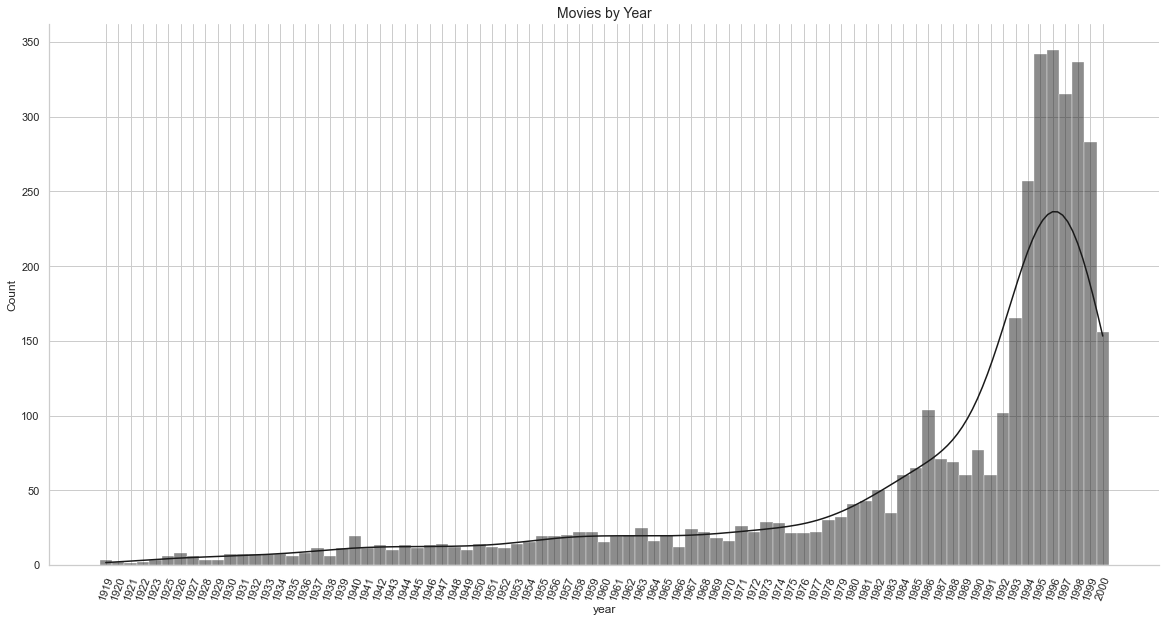

In [13]:
ord_year = clean_df.sort_values(by = 'year')

p = sb.displot(x = 'year',
               data = ord_year,
               kind = 'hist',
               kde = True,
               color = 'k'
              )
p.set_xticklabels(rotation=70)
p.fig.set_size_inches(19,9) 
plt.title('Movies by Year', size=14);


### Exercici 3

En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. 
Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

>PRIMER MIREM LA DISTRIBUCIÓ DELS GENERES EN PERCENTATGE


In [14]:

def get_genre(list_genres):
    return pd.Series([x for list in list_genres for x in list])

In [15]:
genres_presencia = get_genre(df['genre']).value_counts(normalize=True)*100

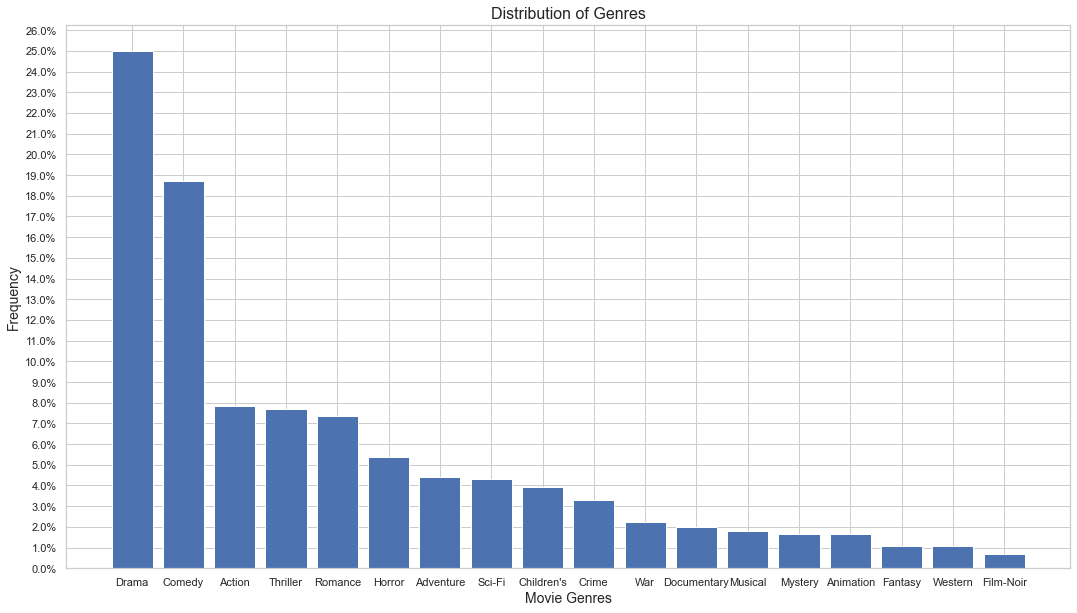

In [16]:
fig, ax = plt.subplots(figsize = (18,10))
ax.bar(genres_presencia.index, genres_presencia.values)
ax.set(yticks=np.arange(0,27,1))
ax.set_ylabel("Frequency", size = 14)
ax.set_xlabel("Movie Genres", size = 14)
ax.set_title("Distribution of Genres", size = 16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('./Movie_Genres_Distribution.png')
plt.show(fig)

>A nivell general s'aprecia una clara dominancia del Drama i la Comedia com a generes mes emprats al llarg dels anys que abarca el dataset estudiat.
Caldria però veure quines son les combinacions mes emprades, i per a obtenir aquest coneixement necesitarem evaluar la correlació que es presenta entre els diferents gèneres i també estudiar-ne l'evol·lució de les distribucions al llarg del temps.

Haurem d'extendre la columna de generes per a poder obtenir cada un dels valors de la serie

In [17]:
expanded_genres = df['genre'].apply(pd.Series)

expanded_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   object
 1   1       1858 non-null   object
 2   2       536 non-null    object
 3   3       115 non-null    object
 4   4       15 non-null     object
 5   5       1 non-null      object
dtypes: object(6)
memory usage: 182.1+ KB


In [18]:
expanded_genres.head(10)

,0,1,2,3,4,5
0,Animation,Children's,Comedy,NaN,NaN,NaN
1,Adventure,Children's,Fantasy,NaN,NaN,NaN
2,Comedy,Romance,NaN,NaN,NaN,NaN
3,Comedy,Drama,NaN,NaN,NaN,NaN
4,Comedy,NaN,NaN,NaN,NaN,NaN
5,Action,Crime,Thriller,NaN,NaN,NaN
6,Comedy,Romance,NaN,NaN,NaN,NaN
7,Adventure,Children's,NaN,NaN,NaN,NaN
8,Action,NaN,NaN,NaN,NaN,NaN
9,Action,Adventure,Thriller,NaN,NaN,NaN


> Haviem fet una variable que separava les combinacions de generes i les comptabilitzaba per a fer el percentatge, podem reutilitzar-ne l'index convertint-lo en una llista de keys per obtenir tots el generes que apareixen a la base de dades.

In [19]:
genres = list(genres_presencia.keys())

genres

['Drama',
 'Comedy',
 'Action',
 'Thriller',
 'Romance',
 'Horror',
 'Adventure',
 'Sci-Fi',
 "Children's",
 'Crime',
 'War',
 'Documentary',
 'Musical',
 'Mystery',
 'Animation',
 'Fantasy',
 'Western',
 'Film-Noir']

> Farem una matriu booleana de columnes = len(genres) i n files = numero de mostres originals del df. Així cada pel·lícula tindrà una columna per a cada gènre, indicant si es True|False que pertany a aquell genere. 

In [20]:

def boolean_df(item_lists, unique_items):# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for item in unique_items:
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

genres_bool = boolean_df(df['genre'], genres)

genres_bool.head()


,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,Sci-Fi,Children's,Crime,War,Documentary,Musical,Mystery,Animation,Fantasy,Western,Film-Noir
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False
2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
genres_corr = round(genres_bool.corr(method = "pearson"),2)
genres_corr

,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,Sci-Fi,Children's,Crime,War,Documentary,Musical,Mystery,Animation,Fantasy,Western,Film-Noir
Drama,1.00,-0.30,-0.17,-0.15,0.02,-0.24,-0.17,-0.19,-0.16,0.01,0.05,-0.14,-0.10,-0.04,-0.14,-0.08,-0.06,-0.06
Comedy,-0.30,1.00,-0.15,-0.20,0.10,-0.13,-0.09,-0.12,0.03,-0.07,-0.08,-0.11,0.02,-0.07,-0.03,-0.01,-0.02,-0.07
Action,-0.17,-0.15,1.00,0.16,-0.06,-0.05,0.27,0.21,-0.06,0.09,0.11,-0.07,-0.05,-0.01,-0.05,0.04,0.01,-0.04
Thriller,-0.15,-0.20,0.16,1.00,-0.06,0.04,-0.01,0.11,-0.10,0.11,-0.04,-0.07,-0.07,0.17,-0.04,-0.04,-0.04,0.11
Romance,0.02,0.10,-0.06,-0.06,1.00,-0.11,-0.02,-0.08,-0.08,-0.06,0.01,-0.07,0.02,-0.00,-0.04,-0.01,-0.03,-0.03
Horror,-0.24,-0.13,-0.05,0.04,-0.11,1.00,-0.06,0.12,-0.08,-0.05,-0.06,-0.06,-0.04,-0.02,-0.05,-0.04,-0.04,-0.02
Adventure,-0.17,-0.09,0.27,-0.01,-0.02,-0.06,1.00,0.18,0.25,-0.03,0.01,-0.05,0.00,-0.03,0.04,0.23,-0.01,-0.02
Sci-Fi,-0.19,-0.12,0.21,0.11,-0.08,0.12,0.18,1.00,-0.02,-0.04,0.00,-0.05,-0.04,-0.01,0.00,0.06,-0.01,-0.01
Children's,-0.16,0.03,-0.06,-0.10,-0.08,-0.08,0.25,-0.02,1.00,-0.06,-0.04,-0.05,0.18,-0.03,0.50,0.27,-0.02,-0.03
Crime,0.01,-0.07,0.09,0.11,-0.06,-0.05,-0.03,-0.04,-0.06,1.00,-0.05,-0.04,-0.04,0.05,-0.04,-0.02,-0.03,0.14


> Pregunta: ¿Si executem el valor mitjà de cada una de les columnes, obtindrem un valor numèric per a cada gènere, que al comparar-lo  amb els altres ens donarà una perspectiva de global de com tendeix a relacionar-se aquell genre concret? 

Segons el que he buscat diu que no, que la probabilitat i les mitjanes aritmètiques, i encara més, els coeficients de correlació, no son figues del mateix paner. Tot això invalida aquesta proposició recomanant que:
". The Fisher z is the most well known correction. There are lots of others. Some of them are more precise than Fisher z. If you're new to this, Fisher z is still a good start."Seifert, Jan. (2020). Re: Average of Pearson correlation coefficient values?. Retrieved from: https://www.researchgate.net/post/average_of_Pearson_correlation_coefficient_values/5e3b3288aa1f096a036db318/citation/download. 
            

> Llavors...si entenem que aquell terme es correcte; 

   - valors positius indicaríen que es troba relacionat amb altres generes, pot ser per lligams forts
    
       
       (i.e: Children's + [Animation | Adventure | Fantasy])
       
    
   - valors propers al zero, donen valors neutres, ja sigui per poca relació sent independents o potser perque tenen una afinitat amb un gènere que n'exclou d'altres:    
    
    
       (i.e: [Horror + Comedy] Vs [Horror + Sci-Fi] 
       
            
   - Valors negatius serien mes aviat indicatiu de gèneres restrictius, o que no acostumen combinar-se.
   
   
        (i.e: [Drama + Comedy]   

In [22]:
round(genres_corr.mean(axis=1).sort_values(ascending=True),2)

Drama         -0.05
Comedy        -0.02
Horror         0.01
Documentary    0.01
Romance        0.03
Western        0.03
War            0.04
Crime          0.05
Thriller       0.05
Mystery        0.05
Film-Noir      0.06
Musical        0.06
Sci-Fi         0.06
Action         0.07
Fantasy        0.08
Animation      0.08
Adventure      0.08
Children's     0.08
dtype: float64

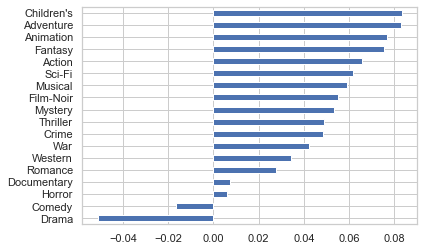

In [23]:
genres_corr.mean(axis=1).sort_values(ascending=True).plot(kind='barh');

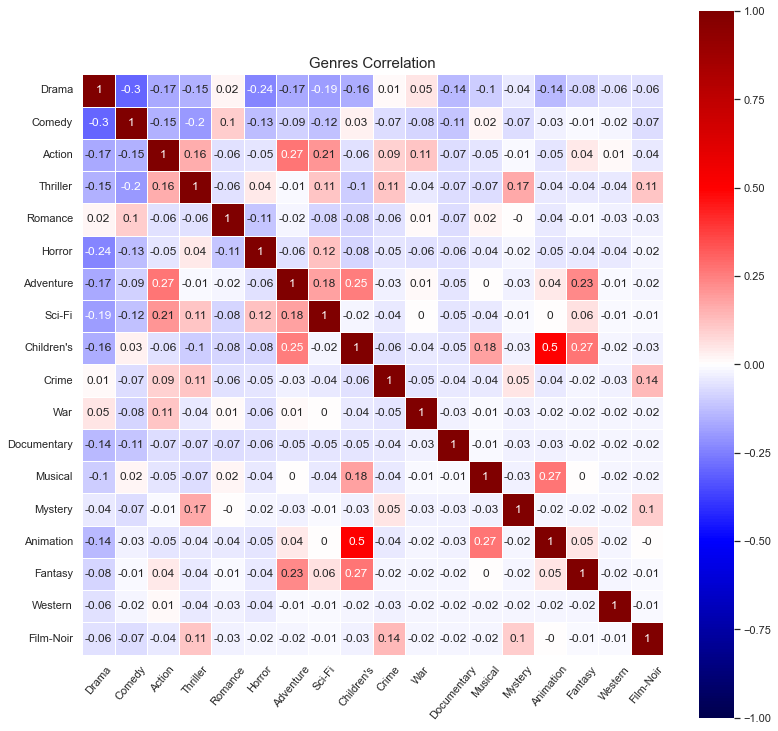

In [24]:
fig, ax = plt.subplots(figsize=(13,13))
ax = sb.heatmap(genres_corr,
                square = True,
                annot = True,
                cmap = 'seismic',
                vmin = -1,
                vmax = 1,
                center = 0, 
                linewidths=.5,
                ax=ax )

plt.xticks(rotation= 50)
plt.title('Genres Correlation', size=15);

>Una vegada ja tenim la matriu de correlacio entre generes, podem començar a veure que:

| Top Positiu Genre Combos | CorrCoef | 
| :---- | :----: |
| Children's + Animation | 0,50 |
| Children's + Fantasy   | 0,27 |  
|Action + Adventure      | 0,27 |        
|Children's + Adventure  | 0,25 |   
|Fantasy + Adventure  | 0,23 |    

   - Del Top de les combinacions de generes amb un valor positiu, la majoria mostren correlació débil a excepció de la combinació  Children's + Animació  que presenta una correl·lació moderada.
   

   - Children's , Adventure , Animation i Fantasy son els generes que mes es combinen 

      
        



| Top Negatiu Genre Combos | CorrCoef | 
| :---- | :----: |
| Drama + Comedy | -0,30 |
| Drama + Horror   | -0,24 |  
|Comedy + Thriller      | -0,20 |        
|Drama + Sci-Fi  | -0,19 |   
|Drama + Adventure     | -0,17 | 
|Drama + Action     | -0,17 | 


   - En aquest cas , les combinacions de gènere amb valor més negatiu, mostren totes una associació debil (tot i que mes endevant es pugui utilitzar el terme correlació, especifico associació ja que tractem amb dades binaries) 
   
   
   - Drama es indiscutiblement el genere mes exclusiu,es a dir, es el que presenta menys associacions sobretot tenint en compte que esta present en un 25% de les mostres d'aquest dataset, sent el més prolífic dels gèneres estudiats.
   
   
   - Comedy, seria el segon més exclusiu , en aquest cas es troba present en el 19% de les mostres.

> Per a poder observar la distribució dels gèneres al llarg dels anys, hauriem de fer un mask a la matriu booleana per a que dongués 0 | 1 , d'aquesta manera tindrém una matriu de valors numèrics que convehirà la mateixa informació, però així podrem comptabilitzar directament.

In [25]:
genres_bool = genres_bool.astype(int)
complete_df = pd.concat([clean_df, genres_bool], axis=1)
complete_df.head()

,movie,year,genre,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,...,Children's,Crime,War,Documentary,Musical,Mystery,Animation,Fantasy,Western,Film-Noir
0,Toy Story,1995,"[Animation, Children's, Comedy]",0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,Jumanji,1995,"[Adventure, Children's, Fantasy]",0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,Grumpier Old Men,1995,"[Comedy, Romance]",0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,1995,"[Comedy, Drama]",1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,[Comedy],0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
grouped = complete_df[['year','Drama','Comedy','Action','Thriller','Romance','Horror', 'Adventure',
                      'Sci-Fi', "Children's",'Crime', 'War', 'Documentary', 'Musical', 'Mystery',
                      'Animation', 'Fantasy','Western', 'Film-Noir']].groupby('year').agg(sum)

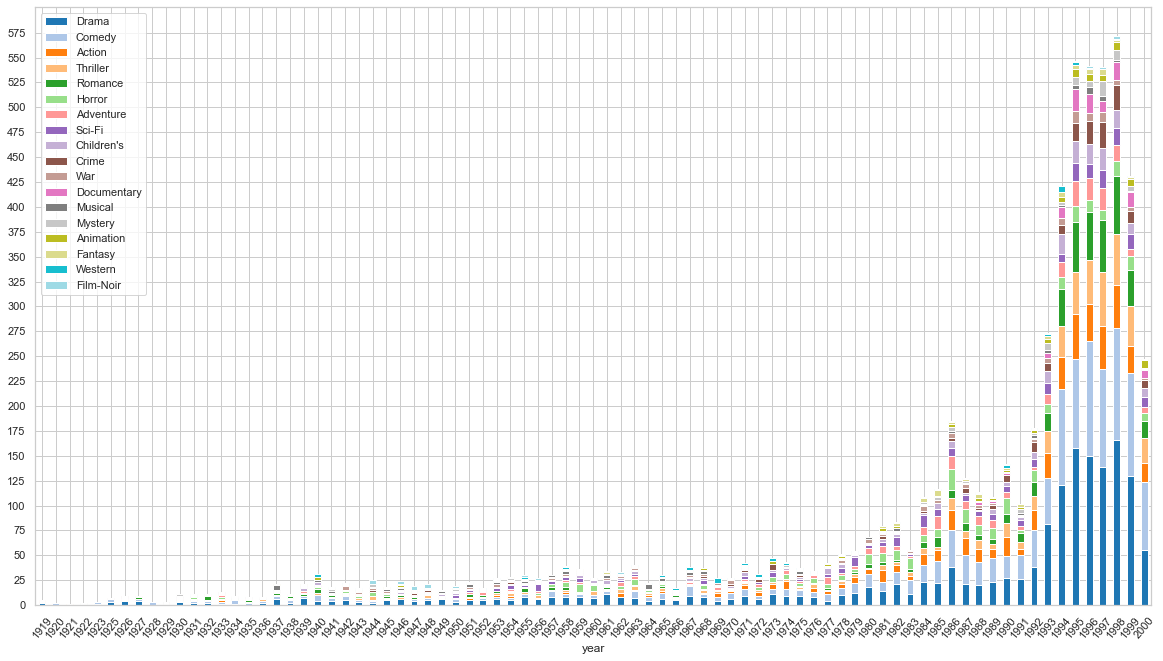

In [27]:
ax = grouped.plot(kind='bar', stacked=True, cmap='tab20', figsize=(20,11)) 

plt.grid(b=True,visible=True)
plt.xticks(rotation= 50)
plt.yticks(np.arange(0,600,25))
plt.show()

>La llàstima es que no es poden apreciar bé les diferències als primers anys, ja que, el fet que el nombre de títols augmenti exponencialment i n'expandeixi els generes al llarg dels anys n'impedeix tenir una imatge més detallada (ensenyant espais en blanc tb que no entren al gràfic) *Potser hagués hagut de normalitzar

>Si Recordem la taula podriem veure com han evolucionat aquest tipus de casos

| Top Positiu Genre Combos | CorrCoef | 
| :---- | :----: |
| Children's + Animation | 0,50 |
| Children's + Fantasy   | 0,27 |  
|Action + Adventure      | 0,27 |        
|Children's + Adventure  | 0,25 |   
|Fantasy + Adventure  | 0,23 |   

>Començarem per el combos: Children's + X 

- Es veu com **es solapen clarament** les línies en determinats moments **fins a mitjans la decada del dels 50's.** I en especial sobretot durant la primera aparició d'ambdos gèneres, **ja que, com a fet especialment remarcable apareixen junts**.


- **Al voltant dels 60's es començen a dissociar**, cosa que fan pensar que **el genere Infantil explora nous formats** que no requereixen de l'animació, per exemple guions adaptats a temàtiques més **aptes per a tots els públics** com per exemple animals (Mr.Ed i Lassie eren TV pero son bons exemples que començen als 50's, explorant la cultura del marketing en aquells temps com també va succeir amb la cultura musical, parafernalia dels Monkees, Simpson's guiño ).


- A partir dels 90's el genere infantil dispara la seva producció, entenent que s'assoleixen tots els medis tècnics a la seva disposició per adaptar qualsevol relat a un genere en concret així com també l'animació , i podriem entrar en temporades d'estrena, es a dir ¿cada quan surt una sequela? (nadal, estiu, semanasanta...).  

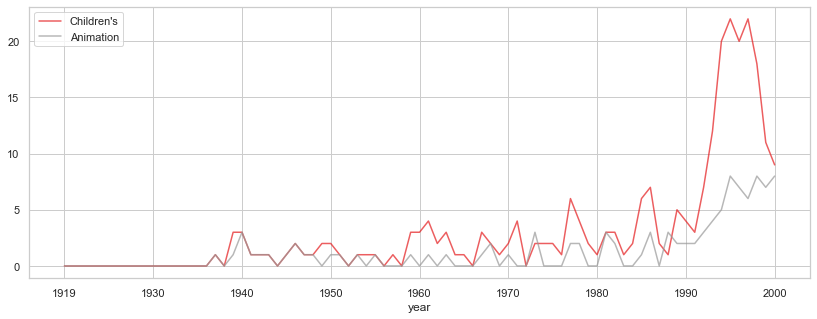

In [28]:
ax = grouped[["Children's","Animation"]].plot(cmap='Set1', alpha=.7, figsize=(14,5));


> Després el Children's + Fantasy:


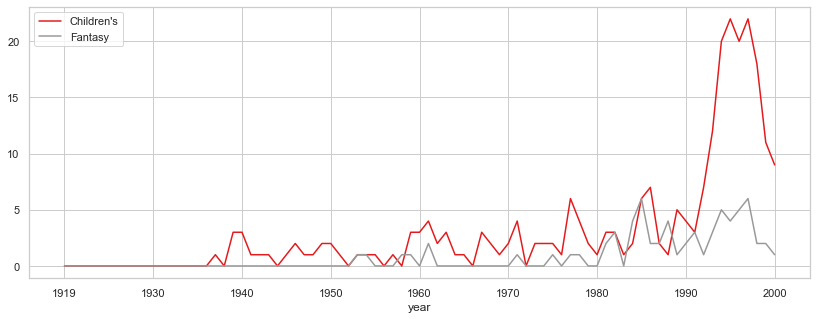

In [29]:
ax = grouped [["Children's", 'Fantasy']].plot(kind='line', cmap='Set1', figsize=(14,5));

> El top combos mes negatius  eren: 

| Top Negatiu Genre Combos | CorrCoef | 
| :---- | :----: |
| Drama + Comedy | -0,30 |
| Drama + Horror   | -0,24 |  
|Comedy + Thriller      | -0,20 |        
|Drama + Sci-Fi  | -0,19 |   
|Drama + Adventure     | -0,17 | 
|Drama + Action     | -0,17 | 
    

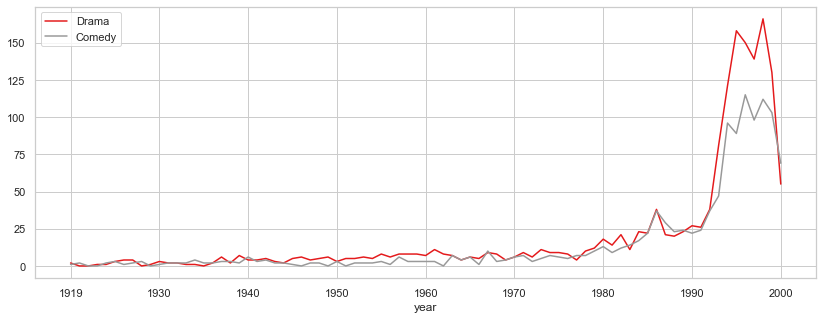

In [30]:
ax = grouped[['Drama', 'Comedy']].plot(kind='line', cmap='Set1', figsize=(14,5));


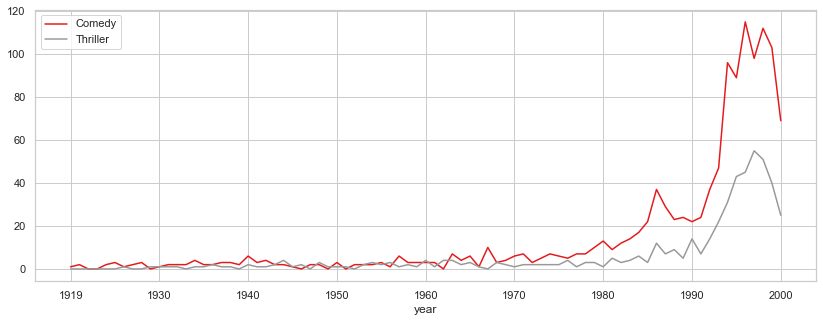

In [31]:
ax = grouped[['Comedy', 'Thriller']].plot(kind='line', cmap='Set1', figsize=(14,5));

> War + Documentary es una barreja que em genera curiositat en especial si es pogués comparar amb el marc temporal de les guerres sigh...(tot i això a partir dels 90's es pot veure que és un gènere que es dispara). I es cert que els festivals cinematogràfics més importants mes tard o mes d'hora han hagut d'incloure la categoria de documental quan els medis de produccció s'han democratitzat/fet mes assequibles (red cameras del creador de les ulleres de sol oakley també ha sigut un pivot important en la cinematografia, la llàstima es que no disposem de dades mes recents per veure-ho, ex: 2007 onwards)

- Data externa important: **gairebé totes les pel·licules dels 21 països que van presentar films al primer festival de Cannes 1946, tractaven sobre la guerra** 

    source : https://fresques.ina.fr/festival-de-cannes-en/parcours/0001/1938-1951-the-birth-of-the-festival.html

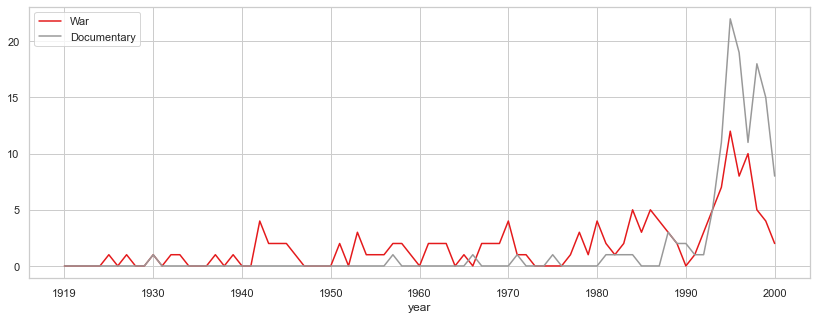

In [32]:
ax = grouped[['War', 'Documentary']].plot(kind='line', cmap='Set1', figsize=(14,5));


> ARA M'AGRADARIA BUSCAR LES SEQÜELES QUE HI HAN EN AQUESTA DATABASE, PER AIXÓ EL MES RÀPID EN COMPTES DE COMPLICAR-ME 
AMB REGEX, ES CREAR DIRECTAMENT UNA LLISTA MANUALMENT I PASSAR-LA COM A ARGUMENT.

In [33]:
seq = ['II','II,','II:','III', 'III,', 'III:', 'IV', 'IV,', 'IV:', ' V ','V,','V:', '2:' '3:', '4:', '5:', 'Episode', 'Chapter', ' Part ']
l = []

#hauré de tirar de regex perque els resultats no son completament fiables, però no puc parar-me

#str.find   or str.extract ??? re.search()  I guess...

for x in seq:
    for m in clean_df['movie'].astype(str):
        if x in m:
            l.append(m) 
#eliminem duplicats
sequels = list(set(l))
#comprobem resultat
sequels


['Phantasm II',
 'Halloween III: Season of the Witch',
 'Penitentiary II',
 'Superman II',
 'Superman IV: The Quest for Peace',
 'Puppet Master 5: The Final Chapter',
 'Death Wish 4: The Crackdown',
 'Highlander III: The Sorcerer',
 'Fright Night Part II',
 'Halloween 5: The Revenge of Michael Myers',
 'Species II',
 'Iron Eagle IV',
 'Poison Ivy II',
 'Children of the Corn II: The Final Sacrifice',
 'Tetsuo II: Body Hammer',
 'Phantasm IV: Oblivion',
 'Godfather: Part III, The',
 'Nightmare on Elm Street 5: The Dream Child, A',
 'Homeward Bound II: Lost in San Francisco',
 'Back to the Future Part II',
 'Beverly Hills Cop III',
 'Back to the Future Part III',
 'Crocodile Dundee II',
 'Prom Night III: The Last Kiss',
 'Star Wars: Episode V - The Empire Strikes Back',
 'Friday the 13th Part VII: The New Blood',
 "Porky's II: The Next Day",
 'Odd Couple II, The',
 'Phantasm III: Lord of the Dead',
 'Richard III',
 'Halloween 4: The Return of Michael Myers',
 'House II: The Second Story',

In [35]:
seq_dict = {}
for x in clean_df['movie']:
    if x in sequels:
        seq_dict[x] = 1
    else:
        seq_dict[x] = 0
        
    
clean_df['sequel'] = pd.DataFrame(seq_dict.values())

sequel_df = clean_df[clean_df['sequel'] == 1]


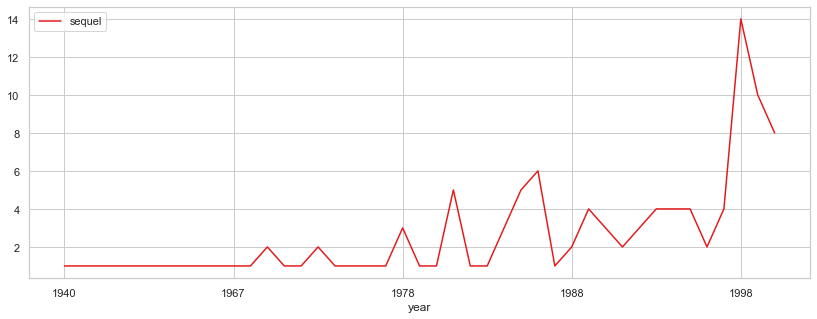

In [36]:
grouped_sequels =  sequel_df[['year','sequel','genre']].groupby('year').agg(sum)
ax = grouped_sequels.plot(kind='line', cmap='Set1', figsize=(14,5));

> Ojo amb les sequeles! Aquí hauriem d'entrar a agrupar tots els titols per poder evaluar les diferents 'onades' de franquícies, tot i que amb el sentit comú (i sobretot tb perqué ho hem viscut) podríem entendre que :
- La "regularitat" de les seqüeles abans del 90's es debien a títols molt concrets que tenien la seva base en el còmic o la "literatura del horror"(i.e: Hellraiser ), per tant el fet de presentar-ne més capítols no resultava antinatural, tenint en compte el seu format original de difusió explotant-ne la seva fan-base.


- Només numéricament podríem entendre el fet que, dins del augment exponencial que es produeix a partir de mitjans dels 90's, hi ha certa tirada a invertir en franquícies que han resultat profitoses anteriorment (tampoc sabem si es compten les edicions VHS, a on evidentment les sequeles augmentaven molt, i.e: el rey leon X)

> Fins aquí l' "estudi", perque si m'hi estic més no podré avançar. **Em fa molta pena no poder continuar** evaluant titols de franquícies en funció del gènere i especialment segons el marc temporal, **pero** no puc estar-m'hi mes si vull avançar en el temari (entenent que la database facilitada no ho conté 'tot', i que **si comencés a contrastar amb dades externes, no obtindriem coneixement real**;


- i.e: guerres mundials en el cas de Documentary+War (la database es només de Hollywood o internacional?, es un fragment?,els "NODO" americans o pura propaganda durant la IIWW estan reflexats?,...) 


- i.e: Evolució de les generacions de CPU en els casos de Animation | Fantasy | Sci-Fi (Com es pot evaluar realment l'impacte de la millora exponecial dels medis CGI (Computer Generated Imagery) i com s'han anat creant niches en funció d'aquestes capacitats?.(explosiones? invita la casa, el guión és lo de menos!)  


- i.e: Vagues de guionistes a Hollywood en el cas de la producció cinematogràfica/Televisiva al llarg del s.XX (aquesta m'ha fet una llàstima especial, per a mi és la més profunda, en especial perque tinc la teoria que el fet que hagin augmentat les seqüeles està directament relacionat a mitj-llarg plaç amb el fet que les productores hagin hagut de "tirar de franquícies" amb idees i marcs pre-concebuts (és a dir, ara et contractem per a guionitzar un spiderman 'X' , ni tant sols per adaptar una novel·la, només per a generar un guió dins del que ja es coneix, a.k.a inventa situacions 'novedoses' per al Spiderman).

https://www.20minutos.es/cinemania/noticias/las-huelgas-que-sacudieron-hollywood-1723/